# Завдання 1.
Розробити типи для облiку вiдпуску медикаментiв у аптечному складi.<br>
Асортимент подано перелiком медикаментiв, якi характеризуються iденти-<br>
фiкацiйним номером, назвою, категорiєю. Цiни медикаментiв визначаються<br>
тарифiкацiйним перелiком, де кожному iдентифiкацiйному номеру постав-<br>
лено у вiдповiднiсть цiну за одиницю лiкiв та вiдсоток знижки для корпо-<br>
ративних клiєнтiв. При розрахунках для корпоративних клiєнтiв реальна<br>
цiна лiкiв знижується на заданий у тарифi вiдсоток. Данi продаж характе-<br>
ризуються iдентифiкацiйним номером проданого товару,кiлькiстю одиниць<br>
та ознакою корпоративного клiєнта (так/нi). Асортимент та тарифи подано<br>
окремими файлами. Продажi також подано кiлькома (> одного) окремими<br>
файлами. Використовуючи pandas:<br>

0. Побудувати датафрейм з iнформацiєю про усi вiдпущенi медикаменти.<br>

1. Отримати у категорiї ПРОДАНИХ медикаментiв, яку вибирати з ви-<br>
падаючого списку, для кожної назви виручену суму у форматi < назва лiкiв - сума >.<br>

2. Отримати для кожної категорiї ПРОДАНИХ медикаментiв виручену<br>
суму у форматi < категорiя - сума >.<br>
2а. Побудувати дiаграму виручених сум по категорiях.<br>

3. Визначити, за медикаменти якої групи отримали найбiльшу виручку<br>
вiд корпоративних клiєнтiв i отримати перелiк цих медикаментiв у форматi<br>
< назва лiкiв - сума >.<br>

4. Отримати виручену суму для кожної категорiї медикаментiв, у яких<br>
були продажi для корпоративних клiєнтiв(враховувати виручку лише вiд<br>
таких продаж).<br>

5. Отримати загальну суму медикаментiв, проданих для корпоративних<br>
клiєнтiв.<br>

6. Отримати у категорiї медикаментiв, яку вибирати з випадаючого спи-<br>
ску, перелiк лiкiв, якi не купували корпоративнi клiєнти.<br>

In [172]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import csv
from matplotlib import pyplot as plt

In [173]:
medicine = pd.read_csv("medicine.csv")
prices = pd.read_csv("prices.csv")
sales = pd.concat([pd.read_csv("sales1.csv"), pd.read_csv("sales2.csv")], ignore_index=True)

display(medicine)
display(prices)
display(sales)


big_df = pd.merge(medicine, prices)
big_df = big_df.merge(sales)
display(big_df)

,m_id,m_name,m_category
0,13944,Stephanie,Product
1,16378,Orpha,Dynamic
2,20061,Karli,National
3,21804,Cleta,Product
4,23281,Angelo,National
5,77980,Blanche,Dynamic
6,35839,Abby,National
7,70495,Garret,Dynamic
8,25730,Nathaniel,Dynamic
9,25731,FFFF,CCCC


,m_id,m_price,m_discount
0,13944,10652.37,28
1,16378,52016.28,97
2,20061,73316.02,24
3,21804,36596.99,40
4,23281,42118.22,22
5,77980,26258.65,39
6,35839,47606.35,8
7,70495,7434.15,79
8,25730,32133.81,78


,m_id,amount,feature
0,13944,2,yes
1,16378,53,yes
2,20061,88,yes
3,21804,26,no
4,23281,16,no
5,77980,87,yes
6,35839,11,no
7,70495,30,no
8,25730,43,yes
9,23281,14,yes


,m_id,m_name,m_category,m_price,m_discount,amount,feature
0,13944,Stephanie,Product,10652.37,28,2,yes
1,13944,Stephanie,Product,10652.37,28,74,yes
2,16378,Orpha,Dynamic,52016.28,97,53,yes
3,16378,Orpha,Dynamic,52016.28,97,6,no
4,20061,Karli,National,73316.02,24,88,yes
5,20061,Karli,National,73316.02,24,3,no
6,21804,Cleta,Product,36596.99,40,26,no
7,21804,Cleta,Product,36596.99,40,73,yes
8,23281,Angelo,National,42118.22,22,16,no
9,23281,Angelo,National,42118.22,22,14,yes


1. Отримати у категорiї ПРОДАНИХ медикаментiв, яку вибирати з ви-<br>
падаючого списку, для кожної назви виручену суму у форматi < назва лiкiв - сума >.<br>

In [174]:
categories = set(big_df["m_category"])

def task1(Category):
    df1 = big_df[big_df.m_category == Category]
    df1.loc[(df1.feature == "yes"), "m_price"] = df1["m_price"] * (1 - df1["m_discount"]/100)
    df1["m_price"] = df1["m_price"] * df1["amount"]
    df1 = df1.loc[:, ['m_name', 'm_price']]
    df1 = df1.groupby(["m_name"]).sum().reset_index()
    indexNames = df1[(df1['m_price'] == 0)].index 
    df1.drop(indexNames , inplace=True)
    display(df1)

interact(task1, Category=categories);

interactive(children=(Dropdown(description='Category', options=('Dynamic', 'Product', 'National'), value='Dyna…

2. Отримати для кожної категорiї ПРОДАНИХ медикаментiв виручену<br>
суму у форматi < категорiя - сума >.<br>
2а. Побудувати дiаграму виручених сум по категорiях.<br>


,m_category,m_price
0,Dynamic,3.557786e+06
1,National,1.010105e+07
2,Product,3.137368e+06


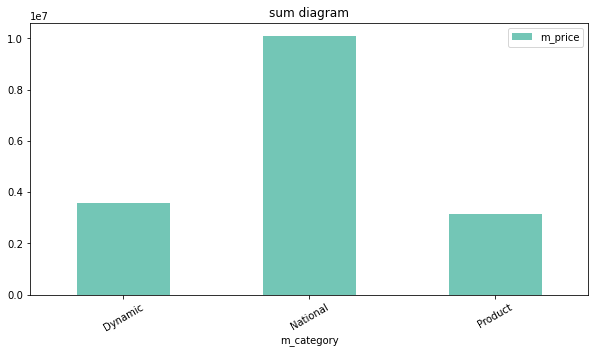

In [175]:
df2 = big_df.copy()
df2.loc[(df2.feature == "yes"), "m_price"] = df2["m_price"] * (1 - df2["m_discount"]/100)
df2["m_price"] = df2["m_price"] * df2["amount"]
df2 = df2.loc[:, ['m_category', 'm_price']]
df2 = df2.groupby(["m_category"]).sum().reset_index()
display(df2)
df2.plot(x="m_category", y="m_price", kind='bar', title="sum diagram", figsize=(10, 5), rot=30, color= '#73C6B6');

3. Визначити, за медикаменти якої групи отримали найбiльшу виручку<br>
вiд корпоративних клiєнтiв i отримати перелiк цих медикаментiв у форматi<br>
< назва лiкiв - сума >.<br>

In [176]:
df3 = big_df.copy()
df3.loc[(df3.feature == "yes"), "m_price"] = df3["m_price"] * (1 - df3["m_discount"]/100)
df3["m_price"] = df3["m_price"] * df3["amount"]
df3 = df3.loc[:, ['m_category', 'm_name', 'm_price']]
df3 = df3.groupby(["m_category", 'm_name']).sum().reset_index()
help_df = df3.groupby(["m_category"]).sum().reset_index()
display(help_df)
df3 = df3[df3["m_category"] == help_df["m_category"]]
df3 = df3.loc[:, ['m_name', 'm_price']]
display(df3)

,m_category,m_price
0,Dynamic,3.557786e+06
1,National,1.010105e+07
2,Product,3.137368e+06


ValueError: Can only compare identically-labeled Series objects

4. Отримати виручену суму для кожної категорiї медикаментiв, у яких<br>
були продажi для корпоративних клiєнтiв(враховувати виручку лише вiд<br>
таких продаж).<br>

In [139]:
df4 = big_df.copy()
df4.loc[(df4.feature == "yes"), "m_price"] = df4["m_price"] * (1 - df4["m_discount"]/100)
df4["m_price"] = df4["m_price"] * df4["amount"]
df4 = df4[df4["feature"] == "yes"]
df4 = df4.loc[:, ['m_category', 'm_price']]
df4 = df4.groupby(["m_category"]).sum().reset_index()
indexNames = df4[(df4['m_price'] == 0)].index 
df4.drop(indexNames , inplace=True)
display(df4)

,m_category,m_price
0,Dynamic,2.355634e+06
1,National,8.472953e+06
2,Product,2.185846e+06


5. Отримати загальну суму медикаментiв, проданих для корпоративних<br>
клiєнтiв.<br>

In [140]:
print(df4.sum().m_price)

13014433.012400001


6. Отримати у категорiї медикаментiв, яку вибирати з випадаючого спи-<br>
ску, перелiк лiкiв, якi не купували корпоративнi клiєнти.<br>

In [171]:
categories = set(big_df["m_category"])

def task1(Category):
    df6 = big_df[big_df.m_category == Category]
    df6 = df6[df6["feature"] == "yes"]
    df6 = df6.loc[:, ['m_name']]
    df6 = df6.drop_duplicates()
    display(df6)

interact(task1, Category=categories);

interactive(children=(Dropdown(description='Category', options=('Dynamic', 'Product', 'National'), value='Dyna…

# without Pandas

In [142]:
class Validation:
    """Class for Validation representation."""

    @staticmethod
    def validateStr(func):
        def validateStrWrapper(w, value):
            if not(isinstance(value, str)):
                raise TypeError('must be an str')
            return func(w, value)
        return validateStrWrapper

    @staticmethod
    def validateFloat(func):
        def validateFloatWrapper(w, value):
            if not(isinstance(value, float)) and not(isinstance(value, int)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            return func(w, value)
        return validateFloatWrapper

    @staticmethod
    def validateInt(func):
        def validateIntWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            return func(w, value)
        return validateIntWrapper

    @staticmethod
    def validateSize(func):
        def validateSizeWrapper(w, value):
            if not(isinstance(value, int)) and not(isinstance(value, float)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateSizeWrapper

    @staticmethod
    def validateAmount(func):
        def validateAmountWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateAmountWrapper

    @staticmethod
    def validateDate(func):
        def validateDateWrapper(w, date):
            datetime.strptime(date, '%Y-%m-%d')
            return func(w, date)
        return validateDateWrapper
    
    @staticmethod
    def validateBool(func):
        def validateBoolWrapper(w, value):
            bools = ['yes', 'no', 'Yes', 'No', '0', '1', 0, 1, True, False, 'True', 'False']
            if value not in bools:
                raise ValueError("mast be boolean")
            return func(w, value)
        return validateBoolWrapper


In [143]:
class Medicine:
    """Class for Medicine representation."""
    
    def __init__(self, m_id, m_name, m_category):
        self.m_id = m_id
        self.m_name = m_name
        self.m_category = m_category
        
    @property
    def m_id(self):
        return self._m_id

    @m_id.setter
    @Validation.validateAmount
    def m_id(self, value):
        self._m_id = value
        
    @property
    def m_name(self):
        return self._m_name

    @m_name.setter
    @Validation.validateStr
    def m_name(self, value):
        self._m_name = value
        
    @property
    def m_category(self):
        return self._m_category

    @m_category.setter
    @Validation.validateStr
    def m_category(self, value):
        self._m_category = value
        
    def __str__(self):
        return f"\nm_id: {self.m_id}\
                 \nm_category: {self.m_category}\
                 \nm_name: {self.m_name}"

    def __repr__(self):
        return f"\nm_id: {self.m_id}\
                 \nm_category: {self.m_category}\
                 \nm_name: {self.m_name}"

In [144]:
class Price:
    """Class for Price representation."""
        
    def __init__(self, m_id, m_price, m_discount):
        self.m_id = m_id
        self.m_price = m_price
        self.m_discount = m_discount
        
    @property
    def m_id(self):
        return self._m_id

    @m_id.setter
    @Validation.validateAmount
    def m_id(self, value):
        self._m_id = value
        
    @property
    def m_price(self):
        return self._m_price

    @m_price.setter
    @Validation.validateFloat
    def m_price(self, value):
        self._m_price = value
    
    @property
    def m_discount(self):
        return self._m_discount

    @m_discount.setter
    @Validation.validateAmount
    def m_discount(self, value):
        self._m_discount = value
        
    def __str__(self):
        return f"\nm_id: {self.m_id}\
                 \nm_price: {self.m_price}\
                 \nm_discount: {self.m_discount}"

    def __repr__(self):
        return f"\nm_id: {self.m_id}\
                 \nm_price: {self.m_price}\
                 \nm_discount: {self.m_discount}"

In [145]:
class Sale:
    """Class for Sale representation."""
        
    def __init__(self, m_id, amount, feature):
        self.m_id = m_id
        self.amount = amount
        self.feature = feature
        
    @property
    def m_id(self):
        return self._m_id

    @m_id.setter
    @Validation.validateAmount
    def m_id(self, value):
        self._m_id = value
        
    @property
    def amount(self):
        return self._amount

    @amount.setter
    @Validation.validateAmount
    def amount(self, value):
        self._amount = value

    @property
    def feature(self):
        return self._feature

    @feature.setter
    @Validation.validateBool
    def feature(self, value):
        self._feature = value
        
    def __str__(self):
        return f"\nm_id: {self.m_id}\
                 \nAmount: {self.amount}\
                 \nfeature: {self.feature}"

    def __repr__(self):
        return f"\nm_id: {self.m_id}\
                 \nAmount: {self.amount}\
                 \nfeature: {self.feature}"

In [146]:
def read_csv_file(file_name, t, objects):  
    with open(file_name, 'r') as v:
        r = csv.reader(v)
        next(r)
        for row in r:
            try:
                objects.append(t(*row))
            except Exception as e:
                print(f'{file_name}:\nline - {len(objects)}: {e}')
                continue

In [147]:
medicine = []
prices = []
sales = []

read_csv_file("medicine.csv", Medicine, medicine)
read_csv_file("prices.csv", Price, prices)
read_csv_file("sales1.csv", Sale, sales)
read_csv_file("sales2.csv", Sale, sales)

medicine, prices, sales

([
  m_id: 13944                 
  m_category: Product                 
  m_name: Stephanie,
  
  m_id: 16378                 
  m_category: Dynamic                 
  m_name: Orpha,
  
  m_id: 20061                 
  m_category: National                 
  m_name: Karli,
  
  m_id: 21804                 
  m_category: Product                 
  m_name: Cleta,
  
  m_id: 23281                 
  m_category: National                 
  m_name: Angelo,
  
  m_id: 77980                 
  m_category: Dynamic                 
  m_name: Blanche,
  
  m_id: 35839                 
  m_category: National                 
  m_name: Abby,
  
  m_id: 70495                 
  m_category: Dynamic                 
  m_name: Garret,
  
  m_id: 25730                 
  m_category: Dynamic                 
  m_name: Nathaniel,
  
  m_id: 25731                 
  m_category: CCCC                 
  m_name: FFFF],
 [
  m_id: 13944                 
  m_price: 10652.37                 
  m_discount: 28,


In [148]:
categories = {}
for a in medicine:
    categories.setdefault(a.m_category, []).append(a)

def choose1(Category):
    for cat in Category:
        pr = 0
        for price in prices:
            for sale in sales:
                if price.m_id == cat.m_id:
                    if sale.feature == 'yes':
                        p = price.m_price*(1-price.m_discount/100)
                    else:
                        p = price.m_price
                        pr += sale.amount*p
        print(f"{cat.m_name} - {pr}")

interact(choose1, Category=categories);

interactive(children=(Dropdown(description='Category', options={'Product': [
m_id: 13944                 
m_ca…

2. Отримати для кожної категорiї ПРОДАНИХ медикаментiв виручену<br>
суму у форматi < категорiя - сума >.<br>
2а. Побудувати дiаграму виручених сум по категорiях.<br>


In [149]:
def draw_histogram(x, y, x_label, y_label, title): 
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.bar(x, y, color='#EB984E', width=0.5, edgecolor='#154360')
    ax.set_title(title, color='black', size=50, fontweight='bold', pad=30)
    ax.set_ylabel(y_label, size=25, fontweight='bold')
    ax.set_xlabel(x_label, size=24, fontweight='bold')
    ax.tick_params(axis='x', rotation=70, direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.tick_params(axis='y', direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.patch.set_facecolor('#FCF3CF')
    fig.patch.set_facecolor('#73C6B6')         
    plt.show()

Product - 3137367.5884
Dynamic - 3557786.4820000003
National - 10101053.692


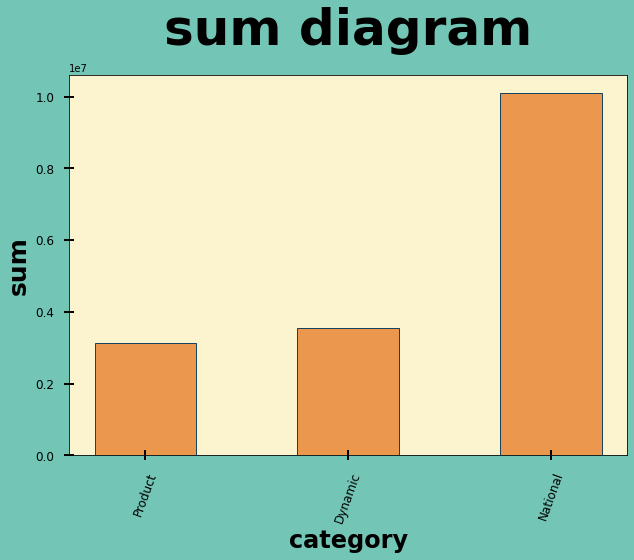

In [150]:
d = {}

for m in medicine:
    for p in prices:
        for s in sales:
            if m.m_id == p.m_id == s.m_id:
                d.setdefault(m.m_category, 0)
                if s.feature == 'yes':
                    pr = p.m_price * (1 - p.m_discount/100) * s.amount
                else:
                    pr = p.m_price * s.amount
                d[m.m_category] += pr
for (k, v) in d.items():
    print(f"{k} - {v}")

draw_histogram(list(d.keys()), list(d.values()), "category", "sum", "sum diagram")

3. Визначити, за медикаменти якої групи отримали найбiльшу виручку<br>
вiд корпоративних клiєнтiв i отримати перелiк цих медикаментiв у форматi<br>
< назва лiкiв - сума >.<br>

In [158]:
max_c = max(d.items(), key=lambda k: k[1])
print(max_c)
med = list(filter(lambda k: k.m_category == max_c[0], medicine))
d = {}
for m in med:
    for p in prices:
        for s in sales:
            if m.m_id == p.m_id == s.m_id:
                d.setdefault(m.m_name, 0)
                if s.feature == 'yes':
                    pr = p.m_price * (1 - p.m_discount/100) * s.amount
                else:
                    pr = p.m_price * s.amount
                d[m.m_name] += pr
    
for (k, v) in d.items():
    print(f"{k} - {v}")



('National', 10101053.692)
Karli - 5123323.4776
Angelo - 1344413.5824000002
Abby - 3633316.632


4. Отримати виручену суму для кожної категорiї медикаментiв, у яких<br>
були продажi для корпоративних клiєнтiв(враховувати виручку лише вiд<br>
таких продаж).<br>

In [166]:
d = {}

for m in medicine:
    for p in prices:
        for s in sales:
            if m.m_id == p.m_id == s.m_id:
                d.setdefault(m.m_category, 0)
                if s.feature == 'yes':
                    pr = p.m_price * (1 - p.m_discount/100) * s.amount
                    d[m.m_category] += pr
for (k, v) in d.items():
    print(f"{k} - {v}")

Product - 2185845.8484
Dynamic - 2355634.0020000003
National - 8472953.162


In [167]:
print(sum(list(d.values())))

13014433.012400001


6. Отримати у категорiї медикаментiв, яку вибирати з випадаючого спи-<br>
ску, перелiк лiкiв, якi не купували корпоративнi клiєнти.<br>

In [170]:
categories = {}
for a in medicine:
    categories.setdefault(a.m_category, []).append(a)

def choose6(Category):
    s = set()
    for cat in Category:
        for sale in sales:
            if sale.m_id == cat.m_id and sale.feature == 'yes':
                s.add(cat.m_name)
    for ss in s:
        print(ss)
                    
interact(choose6, Category=categories);

interactive(children=(Dropdown(description='Category', options={'Product': [
m_id: 13944                 
m_ca…